In [3]:
import pandas as pd
import numpy as np
import re

In [6]:
df=pd.read_csv("/Users/michaelallwright/Documents/github/lipid/streamlit/data/CerSM1.csv")

In [12]:

def findx(string):

	#based on molecule structure being of the form 'Cer (d18:1/18:1)' returns key variables
	b1=string.find('(')
	d=string.find('/')
	b2=string.find(')')
	c1=string[b1+2:b1+4]
	dc1=string[d-1:d]
	c2=string[d+1:d+3]
	dc2=string[d+4:d+5]
	oh=0

	mol_series="d18:"+dc1+"/"+"XX:"+dc2
	if re.search('OH',string):
		oh=1
	
	return c1,dc1,c2,dc2,oh,mol_series



In [13]:
df['Lipid ID'].apply(findx)

0     (18, 1, 14, 0, 0, d18:1/XX:0)
1     (18, 1, 16, 0, 0, d18:1/XX:0)
2     (18, 1, 17, 0, 0, d18:1/XX:0)
3     (18, 1, 18, 0, 0, d18:1/XX:0)
4     (18, 1, 20, 0, 0, d18:1/XX:0)
                  ...              
83    (18, 1, 12, 0, 0, d18:1/XX:0)
84    (18, 1, 18, 0, 0, d18:1/XX:0)
85    (18, 0, 18, 0, 0, d18:0/XX:0)
86    (18, 1, 20, 0, 0, d18:1/XX:0)
87    (18, 0, 24, 1, 0, d18:0/XX:1)
Name: Lipid ID, Length: 88, dtype: object

In [14]:
df['carbs']=df['Lipid ID'].apply(findx)

for i,c in enumerate(['spingoid_backbone_carb', 'spingoid_backbone_dbl_bonds','fatty_acyl_carb', 'fatty_acyl_dbl_bonds',
                    'OH','mol_series']):
    df[c]=df['carbs'].apply(lambda x:x[i])


In [15]:
df

,Unnamed: 0,Species,Lipid ID,Mass,Train/Test,Retention Time,carbs,spingoid_backbone_carb,spingoid_backbone_dbl_bonds,fatty_acyl_carb,fatty_acyl_dbl_bonds,OH,mol_series
0,0,Cer 3mth mice,Cer (d18:1/14:0),510.6,Train,11.930000,"(18, 1, 14, 0, 0, d18:1/XX:0)",18,1,14,0,0,d18:1/XX:0
1,1,Cer 3mth mice,Cer (d18:1/16:0),538.6,Train,12.800000,"(18, 1, 16, 0, 0, d18:1/XX:0)",18,1,16,0,0,d18:1/XX:0
2,2,Cer 3mth mice,Cer (d18:1/17:0),552.7,Train,13.160000,"(18, 1, 17, 0, 0, d18:1/XX:0)",18,1,17,0,0,d18:1/XX:0
3,3,Cer 3mth mice,Cer (d18:1/18:0),566.7,Train,13.510000,"(18, 1, 18, 0, 0, d18:1/XX:0)",18,1,18,0,0,d18:1/XX:0
4,4,Cer 3mth mice,Cer (d18:1/20:0),594.7,Train,14.150000,"(18, 1, 20, 0, 0, d18:1/XX:0)",18,1,20,0,0,d18:1/XX:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,332,Short SM,SM (d18:1/12:0),647.5,Train,2.324850,"(18, 1, 12, 0, 0, d18:1/XX:0)",18,1,12,0,0,d18:1/XX:0
84,369,Short SM,SM (d18:1/18:0),731.6,Train,3.187917,"(18, 1, 18, 0, 0, d18:1/XX:0)",18,1,18,0,0,d18:1/XX:0
85,399,Short Cer,Cer (d18:0/18:0),564.5,Train,3.578483,"(18, 0, 18, 0, 0, d18:0/XX:0)",18,0,18,0,0,d18:0/XX:0
86,407,Short Cer,Cer (d18:1/20:0),594.7,Train,3.925250,"(18, 1, 20, 0, 0, d18:1/XX:0)",18,1,20,0,0,d18:1/XX:0


Cer 3mth mice
Sphingomyelin 3mth mice
Ceramide 6mth mice
Human Hippocamupus Cer
Short Cer
Short SM


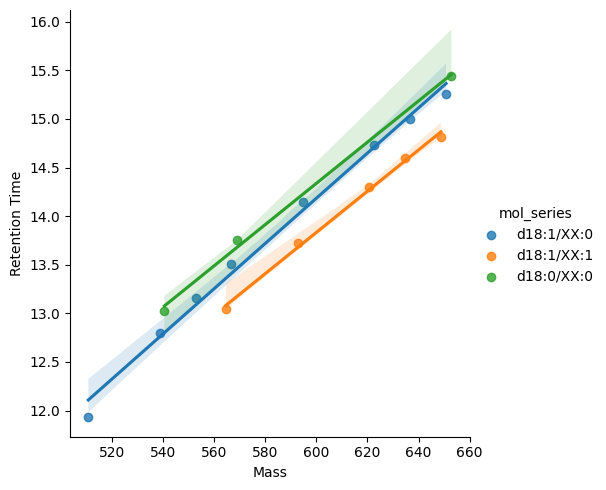

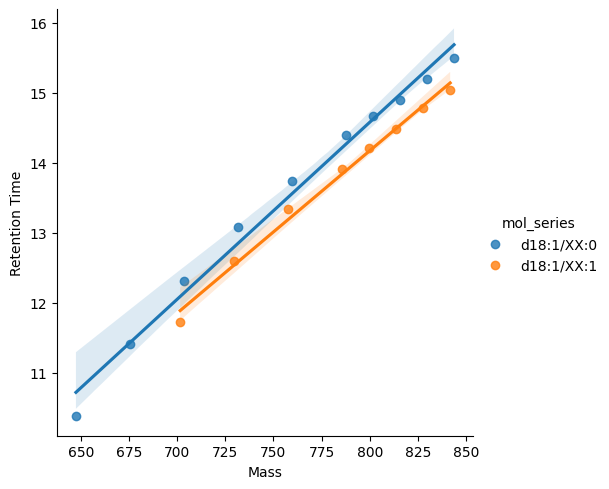

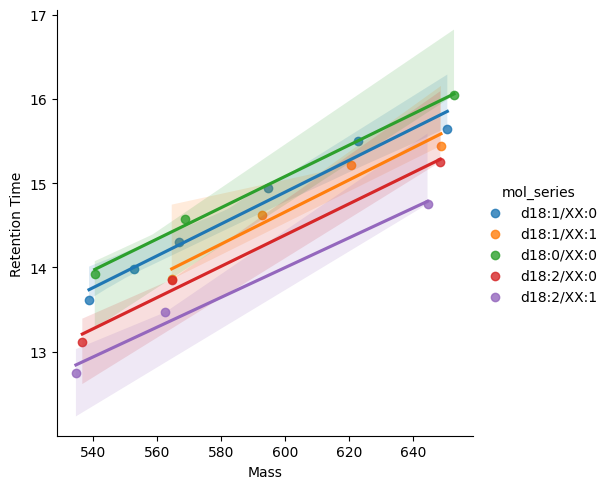

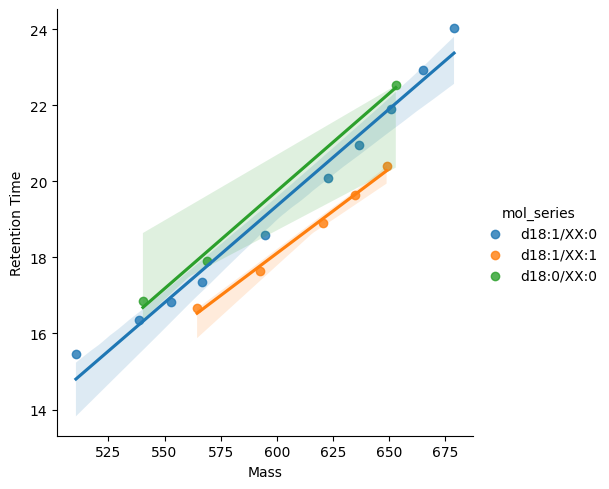

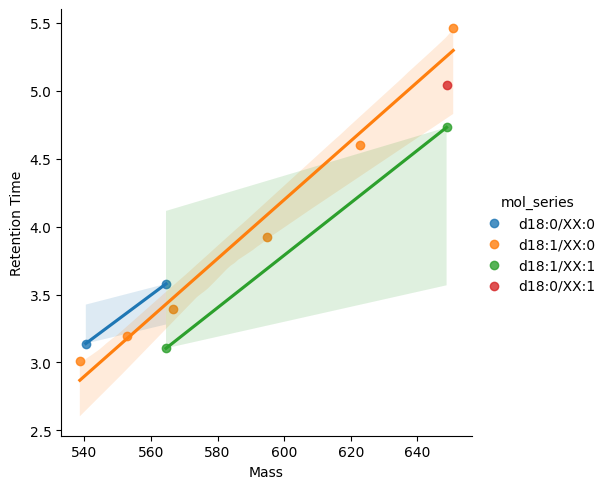

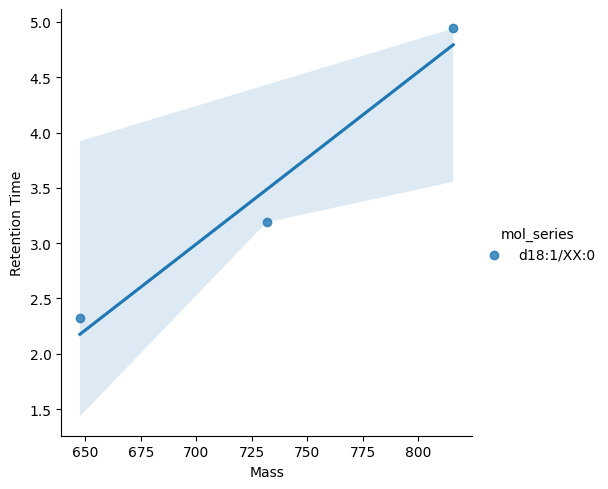

In [17]:
import seaborn as sns

for x in list(df['Species'].unique()):
    print(x)
    mask=(df['Species']==x)
    sns.lmplot(data=df.loc[mask,],x='Mass',y='Retention Time',hue='mol_series')